### Analyzing sales of child car seats at 400 different stores.  

The following questions should be answered using the Carseats data set packaged in the ISLR library. In this task, we will learn how to handle qualitative variables (or categorical variables) in linear regression. 

In [2]:
#data(Carseats)
library(ISLR)
head(Carseats)

Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
11.22,111,48,16,260,83,Good,65,10,Yes,Yes
10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4.15,141,64,3,340,128,Bad,38,13,Yes,No
10.81,124,113,13,501,72,Bad,78,16,No,Yes


In [3]:
str(Carseats)

'data.frame':	400 obs. of  11 variables:
 $ Sales      : num  9.5 11.22 10.06 7.4 4.15 ...
 $ CompPrice  : num  138 111 113 117 141 124 115 136 132 132 ...
 $ Income     : num  73 48 35 100 64 113 105 81 110 113 ...
 $ Advertising: num  11 16 10 4 3 13 0 15 0 0 ...
 $ Population : num  276 260 269 466 340 501 45 425 108 131 ...
 $ Price      : num  120 83 80 97 128 72 108 120 124 124 ...
 $ ShelveLoc  : Factor w/ 3 levels "Bad","Good","Medium": 1 2 3 3 1 1 3 2 3 3 ...
 $ Age        : num  42 65 59 55 38 78 71 67 76 76 ...
 $ Education  : num  17 10 12 14 13 16 15 10 10 17 ...
 $ Urban      : Factor w/ 2 levels "No","Yes": 2 2 2 2 2 1 2 2 1 1 ...
 $ US         : Factor w/ 2 levels "No","Yes": 2 2 2 2 1 2 1 2 1 2 ...


> As you can see, the data frame contains 400 observations, each of which has 11 variables.

#### 2.1 Fit a multiple regression model to predict sales as a function of all the other variables, being careful to handle the qualitative variables.

Now it should be easy for you to build a multiple linear regression model to predict <font color="orange">sales</font> by using all the other variables as predictors. What you should pay attention to is how the <font color="blue"> lm() </font> treats categorical variables.

In [4]:
fit1 = lm(Sales~., data = Carseats)
summary(fit1)


Call:
lm(formula = Sales ~ ., data = Carseats)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.8692 -0.6908  0.0211  0.6636  3.4115 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)      5.6606231  0.6034487   9.380  < 2e-16 ***
CompPrice        0.0928153  0.0041477  22.378  < 2e-16 ***
Income           0.0158028  0.0018451   8.565 2.58e-16 ***
Advertising      0.1230951  0.0111237  11.066  < 2e-16 ***
Population       0.0002079  0.0003705   0.561    0.575    
Price           -0.0953579  0.0026711 -35.700  < 2e-16 ***
ShelveLocGood    4.8501827  0.1531100  31.678  < 2e-16 ***
ShelveLocMedium  1.9567148  0.1261056  15.516  < 2e-16 ***
Age             -0.0460452  0.0031817 -14.472  < 2e-16 ***
Education       -0.0211018  0.0197205  -1.070    0.285    
UrbanYes         0.1228864  0.1129761   1.088    0.277    
USYes           -0.1840928  0.1498423  -1.229    0.220    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual

You have seen that the <font color='blue'>str()</font> shows that <font color='orange'>ShelveLoc</font> is a categorical variable (or factor), which can take values on "bad", "Medium" and "Good". 

In [5]:
contrasts(Carseats$ShelveLoc)

,Good,Medium
Bad,0,0
Good,1,0
Medium,0,1


<font color="blue">contrasts()</font></a> function sets and views the contrasts associated with a factor. 

#### 2.2 For which of the predictors can you reject the null hypothesis <font color="red">H0: j = 0</font>?

In order to answer this question, we need to look at the p-value in the summary, which is indicated by Pr(>|t|).
For the predictors which have the low p-value (less than 0.01), we can reject the null hypothesis. What are the predictors that have a strong association with the predictor?

It means that they have a significant association with the response variable. These predictors are <font color="red">CompPrice</font> (Price charged by competitor at each location), <font color="red">Income</font>, <font color="red">Advertising</font>, <font color="red">Price</font>, <font color="red">ShelveLocation</font> (indicating the quality of the shelving location), and <font color="red">Age</font>. The others could be excluded from the linear model in order to make the model simple.

#### 2.3 On the basis of your response to the previous question, fit a smaller model that only uses the predictors for which there is evidence of association with the outcome

In this task, we are going to build a new multiple linear regression model. The new model includes the predictors which had the significant association with the response variable in the previous model. We are going to explore the difference between a full model and a model with less but meaningful predictors. Here we will use the variables identified in Question 2.2.

In [6]:
fit2 = lm(Sales~ CompPrice + Income + Advertising + Price + ShelveLoc + Age, data = Carseats)
summary(fit2)


Call:
lm(formula = Sales ~ CompPrice + Income + Advertising + Price + 
    ShelveLoc + Age, data = Carseats)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.7728 -0.6954  0.0282  0.6732  3.3292 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)      5.475226   0.505005   10.84   <2e-16 ***
CompPrice        0.092571   0.004123   22.45   <2e-16 ***
Income           0.015785   0.001838    8.59   <2e-16 ***
Advertising      0.115903   0.007724   15.01   <2e-16 ***
Price           -0.095319   0.002670  -35.70   <2e-16 ***
ShelveLocGood    4.835675   0.152499   31.71   <2e-16 ***
ShelveLocMedium  1.951993   0.125375   15.57   <2e-16 ***
Age             -0.046128   0.003177  -14.52   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.019 on 392 degrees of freedom
Multiple R-squared:  0.872,	Adjusted R-squared:  0.8697 
F-statistic: 381.4 on 7 and 392 DF,  p-value: < 2.2e-16


#### 2.4 How well do the models in <font color="red">2.1</font> and <font color="red">2.3</font> fit the data?

Now, we want to compare these two models. For this purpose, we examine the models using the following items:
* Look at the <font color="red">R-squared</font> and <font color="red">F</font> statistics and the corresponding p-values.
* Check the residuals with various residual plots.
* Perform F-tests by comparing the two models using the <font color="blue">anova()</font> function

As can be seen, there is not much difference between the full model and the one with less predictors. The multiple R-squared and the adjusted R-squared scores slightly drops. The trade-off between simple model and modeling accuracy is very small. In this case, we would like to choose the simple model.

Of course, you can also compare the diagnostic plots, for example

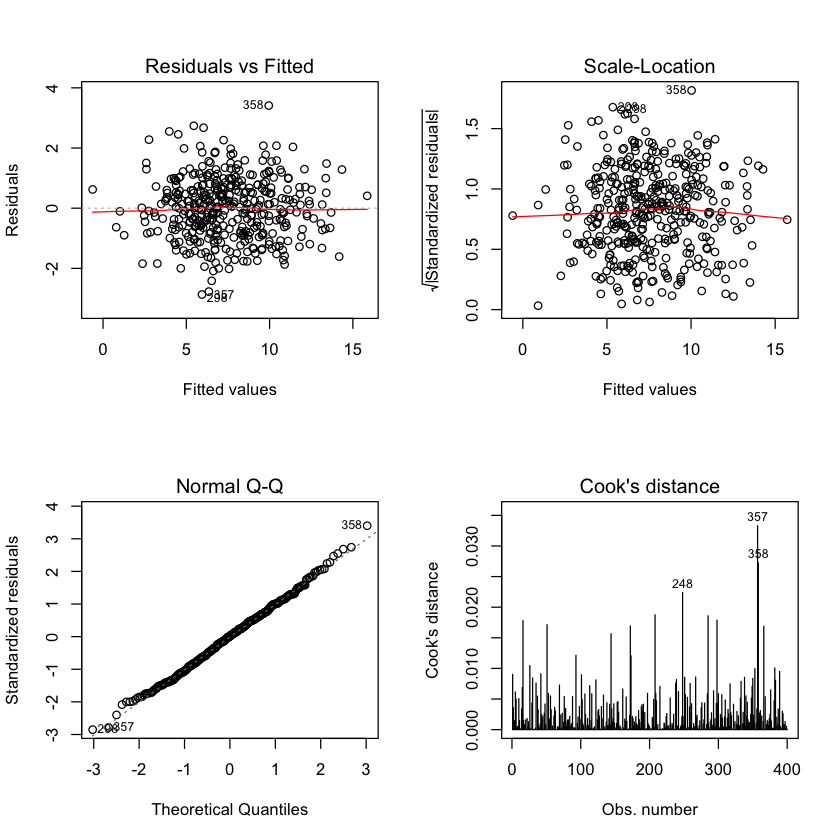

In [7]:
par(mfcol=c(2,2))
plot(fit1, which = 1)
plot(fit1, which = 2)
plot(fit2, which = 3)
plot(fit2, which = 4)

The plots show that both models comply with the assumptions.
We can also use the <font color="blue">anova</font> function.

In [8]:
anova(fit1, fit2)

Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
388,402.8335,NA,NA,NA,NA
392,407.3869,-4,-4.553347,1.09642,0.3579599


#### 2.5 Select the best regression variables with the <a href="https://stat.ethz.ch/R-manual/R-devel/library/stats/html/step.html"><font color="blue">step()</font></a> function.

In [9]:
step1 <- step(fit1)

Start:  AIC=26.82
Sales ~ CompPrice + Income + Advertising + Population + Price + 
    ShelveLoc + Age + Education + Urban + US

              Df Sum of Sq     RSS    AIC
- Population   1      0.33  403.16  25.15
- Education    1      1.19  404.02  26.00
- Urban        1      1.23  404.06  26.04
- US           1      1.57  404.40  26.38
<none>                      402.83  26.82
- Income       1     76.16  478.99  94.09
- Advertising  1    127.14  529.97 134.54
- Age          1    217.44  620.27 197.48
- CompPrice    1    519.91  922.74 356.35
- ShelveLoc    2   1053.20 1456.03 536.80
- Price        1   1323.23 1726.06 606.85

Step:  AIC=25.15
Sales ~ CompPrice + Income + Advertising + Price + ShelveLoc + 
    Age + Education + Urban + US

              Df Sum of Sq     RSS    AIC
- Urban        1      1.15  404.31  24.29
- Education    1      1.36  404.52  24.49
- US           1      1.89  405.05  25.02
<none>                      403.16  25.15
- Income       1     75.94  479.10  92.18

As shown above, what is the best model you see? 

#### 2.6 Expand the model in <font color="red">2.3</font> with interaction effects using the <font color="red">*</font> and <font color="red">:</font> symbols. 
In order to further explore the data set and study the model, we want to investigate how the potential interactions between predictors can effect the linear model. Here we'd like to try <font color="blue">income: advertising</font>,  <font color="blue">price:age</font>, or both. Do any interactions appear to be statistically significant?

The function you used is the <font color="blue">update()</font> function.

In [10]:
fit3 = update(fit2, . ~ . + Income: Advertising)
summary(fit3)


Call:
lm(formula = Sales ~ CompPrice + Income + Advertising + Price + 
    ShelveLoc + Age + Income:Advertising, data = Carseats)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.8365 -0.7154  0.0082  0.6731  3.3728 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)         5.7252919  0.5083105  11.263  < 2e-16 ***
CompPrice           0.0929201  0.0040888  22.725  < 2e-16 ***
Income              0.0106546  0.0025709   4.144 4.18e-05 ***
Advertising         0.0615973  0.0206746   2.979  0.00307 ** 
Price              -0.0952009  0.0026469 -35.967  < 2e-16 ***
ShelveLocGood       4.8476841  0.1512156  32.058  < 2e-16 ***
ShelveLocMedium     1.9578038  0.1242880  15.752  < 2e-16 ***
Age                -0.0454636  0.0031575 -14.399  < 2e-16 ***
Income:Advertising  0.0007805  0.0002760   2.828  0.00493 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.01 on 391 degrees of freedom
Multiple R-squar

In [11]:
fit4 = update(fit3, . ~ . + Price: Age)
summary(fit4)


Call:
lm(formula = Sales ~ CompPrice + Income + Advertising + Price + 
    ShelveLoc + Age + Income:Advertising + Price:Age, data = Carseats)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.8199 -0.7116  0.0023  0.6831  3.2763 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)         6.4243499  0.9646032   6.660 9.33e-11 ***
CompPrice           0.0928079  0.0040924  22.678  < 2e-16 ***
Income              0.0108875  0.0025863   4.210 3.18e-05 ***
Advertising         0.0637965  0.0208420   3.061 0.002359 ** 
Price              -0.1010926  0.0073986 -13.664  < 2e-16 ***
ShelveLocGood       4.8326896  0.1522867  31.734  < 2e-16 ***
ShelveLocMedium     1.9461356  0.1250819  15.559  < 2e-16 ***
Age                -0.0586996  0.0158383  -3.706 0.000241 ***
Income:Advertising  0.0007561  0.0002776   2.724 0.006748 ** 
Price:Age           0.0001130  0.0001325   0.853 0.394279    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In [14]:
anova(fit2, fit3, fit4)

Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
392,407.3869,NA,NA,NA,NA
391,399.2228,1,8.1640568,7.9903251,0.004944966
390,398.4797,1,0.7431279,0.7273141,0.394278612


In the ANOVA test, which model is better and made a significant difference.

#### Using the model from <font color="red">2.6</font>, obtain 95% confidence intervals for the coefficients.

In [15]:
confint(fit3, level = 0.95)

,2.5 %,97.5 %
(Intercept),4.7259282932,6.724655507
CompPrice,0.0848812789,0.100958927
Income,0.0056000685,0.015709098
Advertising,0.0209499979,0.102244701
Price,-0.1004048098,-0.089996895
ShelveLocGood,4.5503868572,5.144981440
ShelveLocMedium,1.7134473389,2.202160234
Age,-0.0516713660,-0.039255919
Income:Advertising,0.0002378429,0.001323225


#### 2.8 Is there evidence of outliers or high leverage observations in the model?

There are many ways of checking if there are some outliers in your data. As discussed in the core textbook, we can use residual plots to identify outliers. Let's have a look

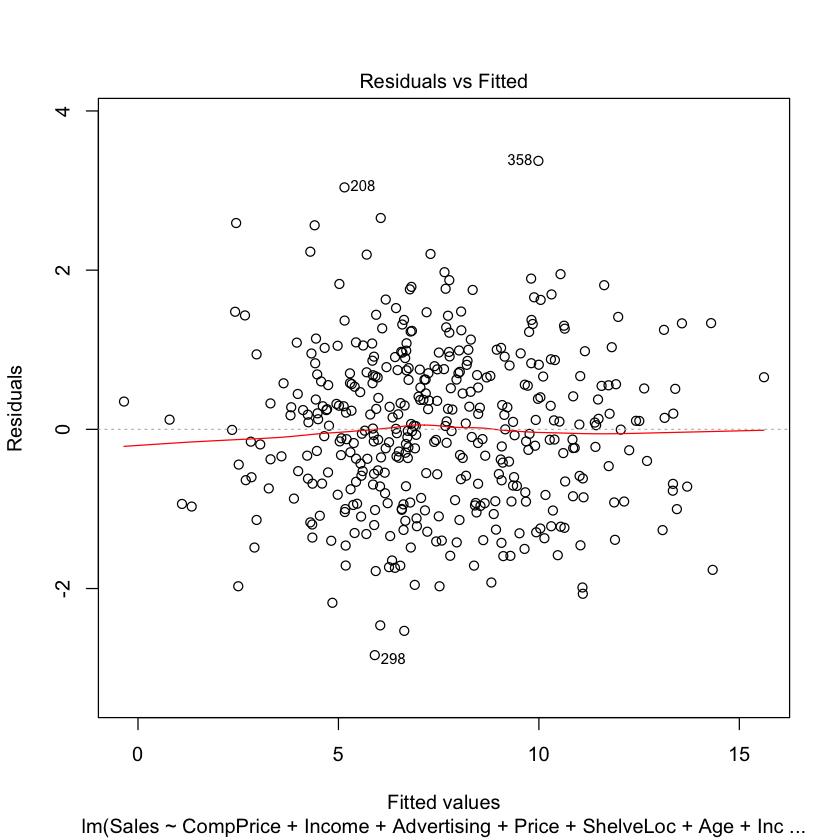

In [16]:
plot(fit3, which = 1)

In the plot above, we can find some data points that stay a bit far from the majority of the points. Can we conclude that there are some outliers?

Let's use the <a href="http://artax.karlin.mff.cuni.cz/r-help/library/art/html/outlierTest.html"><font color="blue">outlierTest()</font></a> function to do an outlier test. The function will report the Bonferroni p-values for studentized residuals in linear regression models.

In [17]:
library(car)
outlierTest(fit3, cutoff=0.05, digits = 1)

ERROR: Error in library(car): there is no package called ‘car’


The test shows that data point <font color='red'>358</font> is not an outlier.

Are there any influential data points? To answer this question, we can use the <font color="blue">influencePlot()</font> function. If influential points are identified, the function will also return a data frame with the hat values, Studentized residuals and Cook's distance.

Warning message in plot.window(...):
""id.method" is not a graphical parameter"Warning message in plot.xy(xy, type, ...):
""id.method" is not a graphical parameter"Warning message in axis(side = side, at = at, labels = labels, ...):
""id.method" is not a graphical parameter"Warning message in axis(side = side, at = at, labels = labels, ...):
""id.method" is not a graphical parameter"Warning message in box(...):
""id.method" is not a graphical parameter"Warning message in title(...):
""id.method" is not a graphical parameter"Warning message in plot.xy(xy.coords(x, y), type = type, ...):
""id.method" is not a graphical parameter"

,StudRes,Hat,CookD
76,0.4635676,0.07562967,0.001957504
208,3.0767511,0.02340162,0.024669972
248,2.6373894,0.03960442,0.031393092
306,1.2764466,0.09078717,0.018047758
357,-2.5051422,0.04076356,0.029238021
358,3.4173263,0.01987199,0.025608697


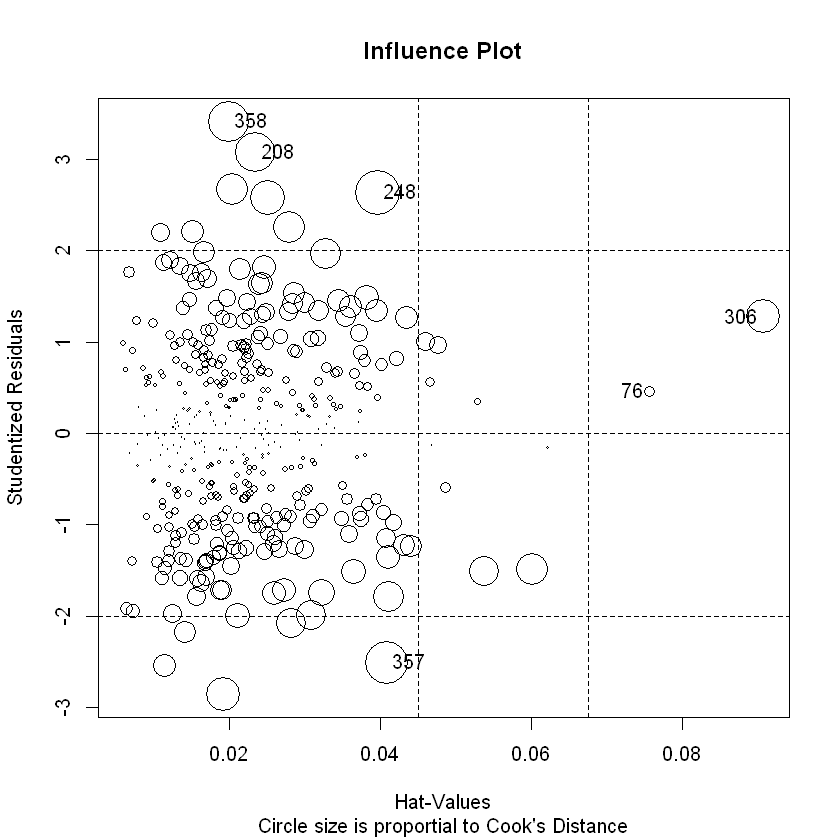

In [37]:
influencePlot(fit3, scale=5, id.method="noteworthy", main="Influence Plot", sub="Circle size is proportial to Cook's Distance" )

In the influence plot, the two dashed vertical lines are drawn at twice and three times the average hat value respectively. The three horizontal lines are drawn at -2, 0 and 2 on the Studentized-residual scale.

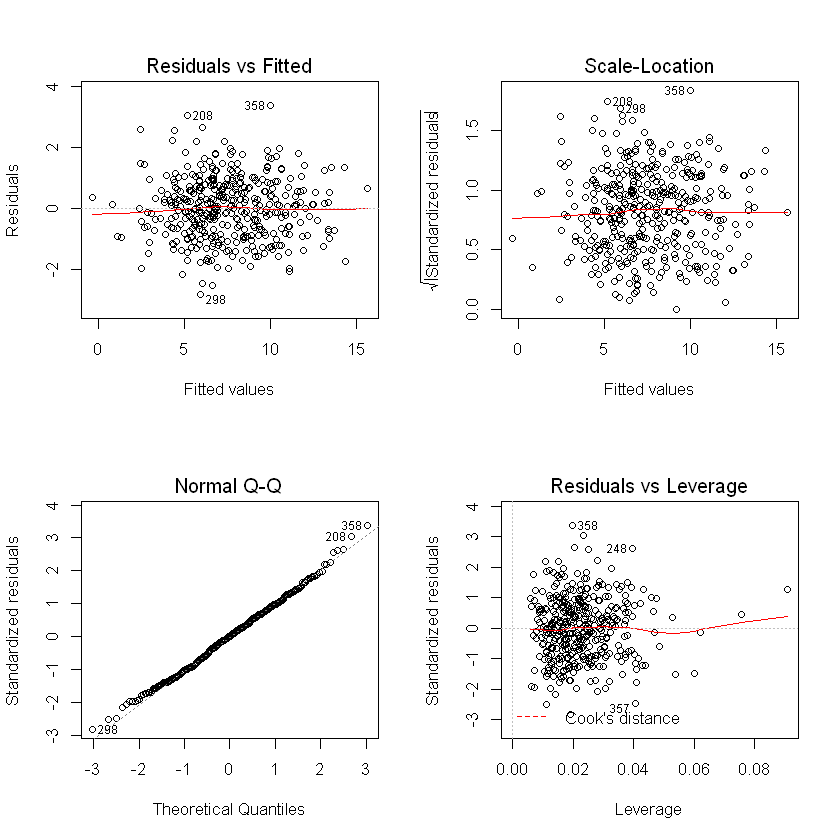

In [38]:
par(mfcol=c(2,2))
plot(fit3)